In [1]:
import pandas as pd

In [2]:
gi = pd.read_excel('giraffe.xlsx')

In [3]:
gi_orig_size = len(gi.index)
print(f'giraffe data has {gi_orig_size} rows')

giraffe data has 1582 rows


In [4]:
for c in gi.columns:
    print(c)

DATE
DATE.1
IMAGE ID
INDIVIDUAL
CORRIDOR
CAMERA
HOUR
SEX
DIRECTION
Direction (numerical)
IN
OUT
GROUP SIZE
CAMERA TEMPERATURE
MOONPHASE
Passage W/O along
Passage
COMMENT
MOON LUMINOSITY
MEAN TEMP
PRESSURE
HUMIDITY
WIND SPEED
CLOUD COVERAGE
DATE.2


In [6]:
# drop irrelevant cols
gi = gi.drop(['IMAGE ID', 'INDIVIDUAL', 'CAMERA', 
             'CAMERA TEMPERATURE','MOONPHASE',
              'Direction (numerical)'], axis=1)

In [5]:
gi.Passage.unique()

array([0, 1, '*', 713, nan], dtype=object)

In [7]:
# drop missing data and outlier
gi = gi[(gi.Passage != '*') & (gi.Passage != 713)]
gi = gi[gi.Passage.isna() == False]

In [8]:
print('{:.2f}% of data remaining after filter on Passage'
      .format(len(gi.index) / gi_orig_size))

0.90% of data remaining after filter on Passage


In [9]:
gi.Passage.unique()

array([0, 1], dtype=object)

In [10]:
# convert to numeric
gi['Passage'] = gi['Passage'].astype(int)

In [11]:
gi.Passage.dtype

dtype('int64')

In [12]:
gi.DIRECTION.unique()

array([nan, 'IN', 'OUT', 'ALONG', 'UNKNOWN'], dtype=object)

In [13]:
# drop where DIRECTION = "Along"
gi = gi[gi.DIRECTION != 'ALONG']
print('{:.2f}% of data remaining after filter on DIRECTION != ALONG'
      .format(len(gi.index) / gi_orig_size))

0.81% of data remaining after filter on DIRECTION != ALONG


In [14]:
# drop missing HOUR values
gi = gi[gi.HOUR.isna() == False]
print('{:.2f}% of data remaining after filter on HOUR'
      .format(len(gi.index) / gi_orig_size))

0.36% of data remaining after filter on HOUR


Det fanns mycket saknade HOUR värden..

### Vilken tid på dygnet använder girafferna korridoren? Passage vs hour

In [15]:
# set hour to int
gi['HOUR'] = gi['HOUR'].astype(int)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [17]:
hour_group = gi.groupby('HOUR').sum()['Passage'].reset_index()

In [18]:
palette = sns.color_palette("RdBu_r", 7)

Text(0.5, 1.0, 'Passages in either direction by hour')

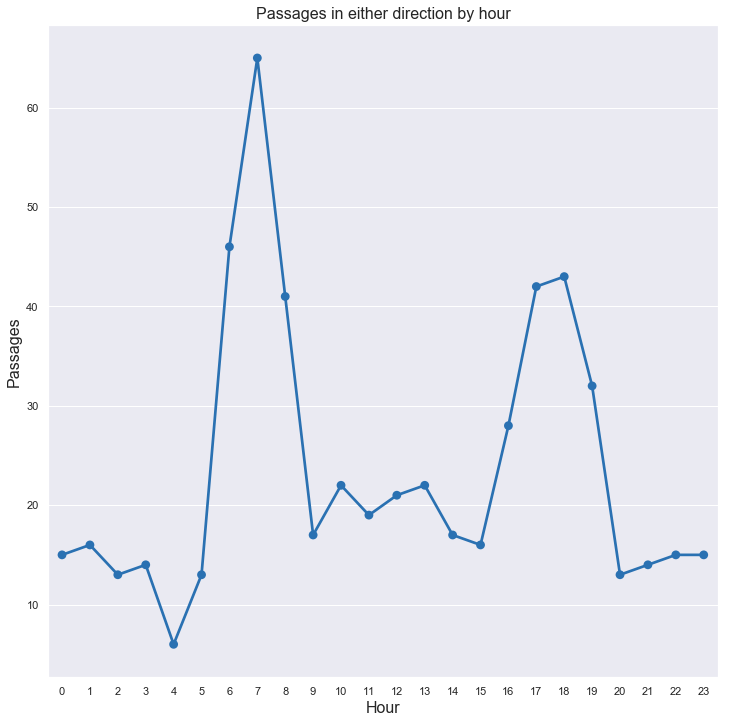

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by hour', fontsize=16)

### Hur många passager görs respektive månad? Passage vs månad

In [130]:
month_group = gi.groupby('DATE.1').sum()['Passage'].reset_index()

In [131]:
date_map = {month: i for i, month in enumerate(a)}

In [132]:
[x for x in month_group['DATE.1'].unique()]

['april',
 'augusti',
 'december',
 'februari',
 'januari',
 'juli',
 'juni',
 'maj',
 'mars',
 'november',
 'oktober',
 'september']

In [141]:
a = ['januari','februari','mars','april','maj','juni','juli','augusti','september','oktober','november','december']

In [142]:
date_map = {month: i for i, month in enumerate(a)}

In [143]:
date_map

{'januari': 0,
 'februari': 1,
 'mars': 2,
 'april': 3,
 'maj': 4,
 'juni': 5,
 'juli': 6,
 'augusti': 7,
 'september': 8,
 'oktober': 9,
 'november': 10,
 'december': 11}

In [144]:
def add_month_digits(x):
    x['i'] = 0
    for month, i in date_map.items():
        x.loc[x['DATE.1'] == month, 'i'] = i
    return x

In [145]:
month_group = add_month_digits(month_group)

In [151]:
month_group = month_group.sort_values(by='i')

In [152]:
month_group

,DATE.1,Passage,i
4,januari,38,0
3,februari,25,1
8,mars,39,2
0,april,34,3
7,maj,12,4
6,juni,42,5
5,juli,75,6
1,augusti,53,7
11,september,41,8
10,oktober,98,9


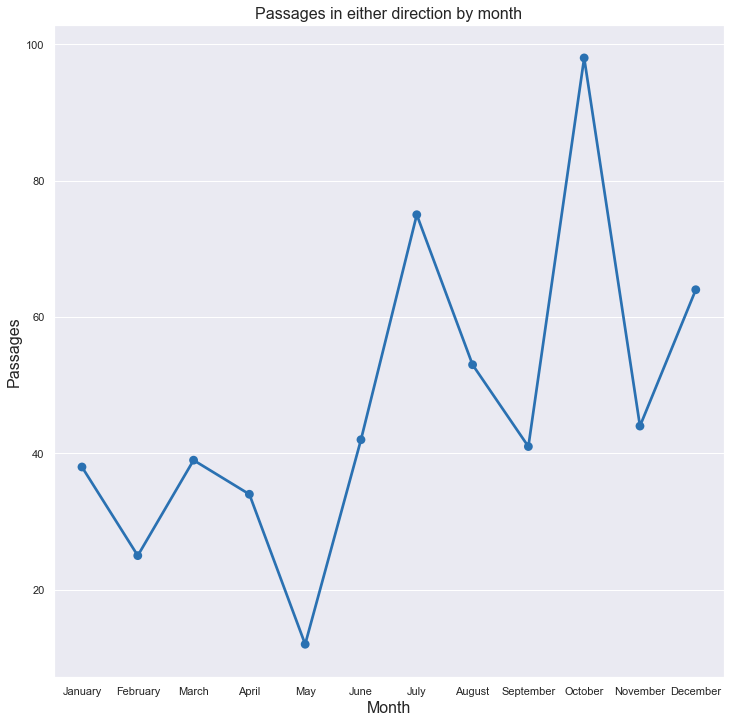

In [153]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by month', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

### Vilken tid på dygnet går de in? In/direction vs hour

In [23]:
in_group = gi[gi.DIRECTION == 'IN'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going in by hour')

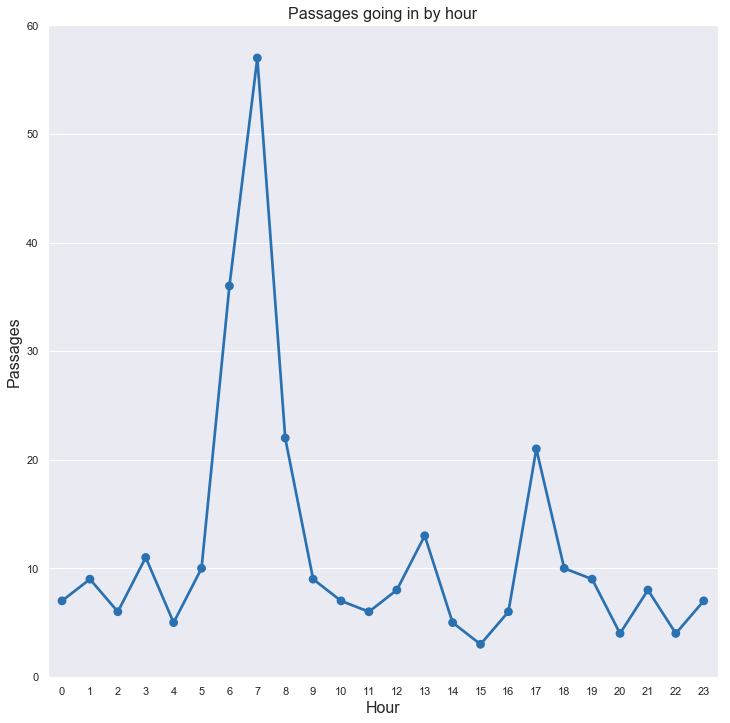

In [210]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going in by hour', fontsize=16)

### Vilken tid på dygnet går de in? In/direction vs hour

In [25]:
out_group = gi[gi.DIRECTION == 'OUT'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going out by hour')

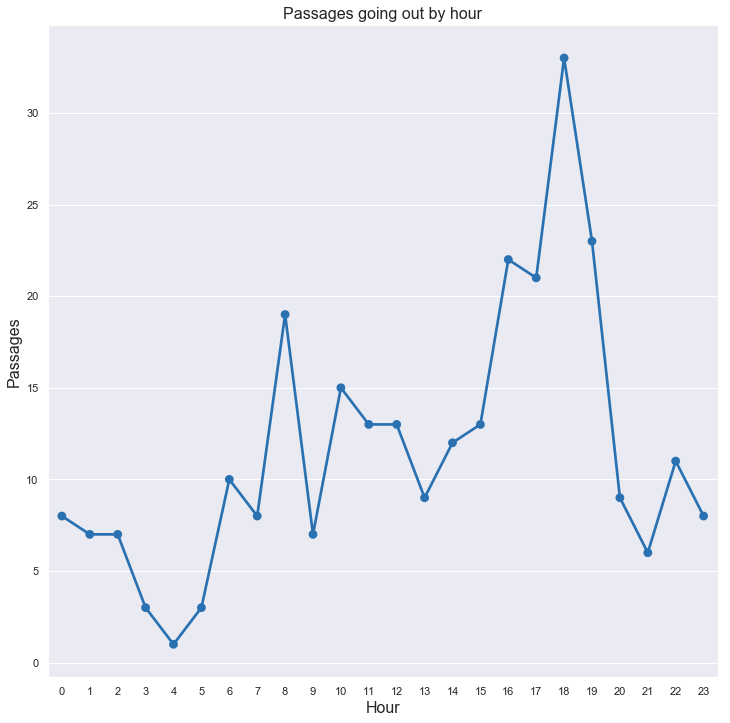

In [209]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages going out by hour', fontsize=16)

### Det kanske går att göra en graf med tre variabler både för in, ut och timme?

In [27]:
import matplotlib.patches as mpatches

In [226]:
direction_group = gi[(gi.DIRECTION == 'IN') | (gi.DIRECTION == 'OUT')].groupby(['HOUR', 'DIRECTION']).sum()['Passage'].reset_index()

In [211]:
both_group = direction_group.copy()

In [221]:
both_group = both_group.groupby('HOUR').sum()['Passage'].reset_index()

In [228]:
both_group = both_group[['HOUR', 'DIRECTION', 'Passage']]

In [223]:
both_group['DIRECTION'] = 'EITHER'

In [229]:
direction_group = direction_group.append(both_group)

In [230]:
direction_group

,HOUR,DIRECTION,Passage
0,0,IN,7
1,0,OUT,8
2,1,IN,9
3,1,OUT,7
4,2,IN,6
5,2,OUT,7
6,3,IN,11
7,3,OUT,3
8,4,IN,5
9,4,OUT,1


Text(0.5, 1.0, 'Passages by hour')

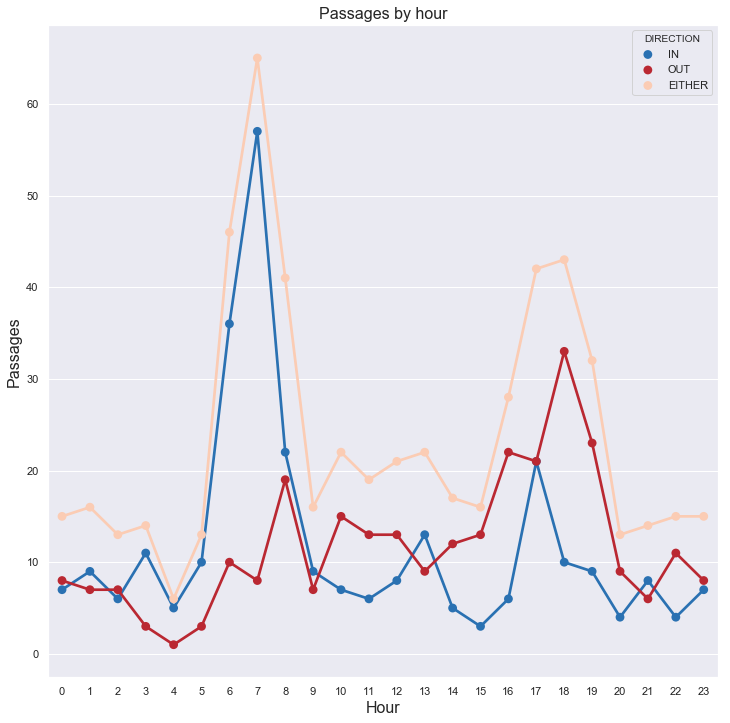

In [231]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=direction_group, palette=[palette[0], palette[-1], palette[4]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

In [30]:
# drop SEX missing values
gi = gi[gi['SEX'].isna() == False]

In [31]:
sex_group = gi.groupby(['HOUR', 'SEX']).sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages by hour')

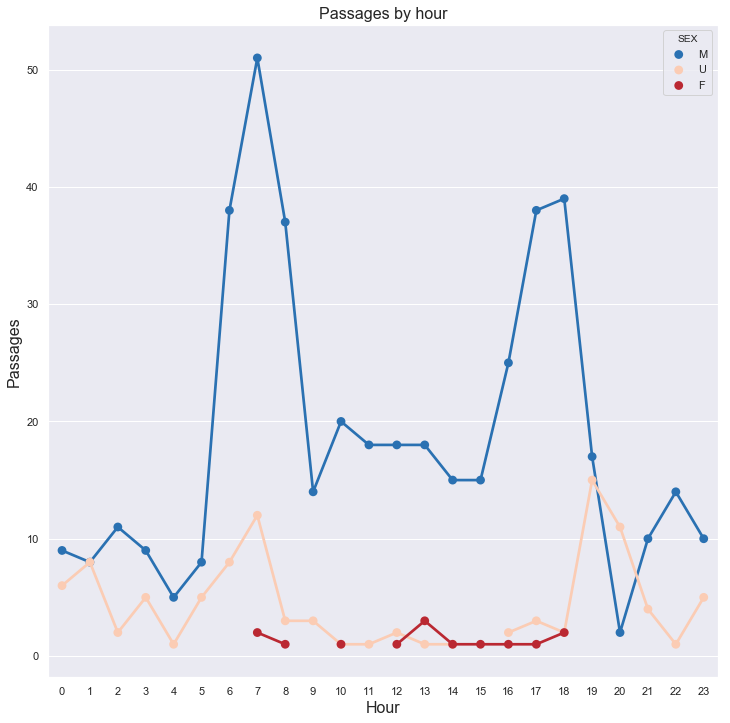

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_group, palette=[palette[0], palette[4], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

### Hur många djur använder korridoren samtidigt? Passage vs group size

In [33]:
gi['GROUP SIZE'] = gi['GROUP SIZE'].astype(int)

In [34]:
group_size = gi.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [35]:
group_size

,GROUP SIZE,Passage
0,1,402
1,2,91
2,3,28
3,4,14
4,5,24
5,6,6


Text(0.5, 1.0, 'Passages in different group sizes')

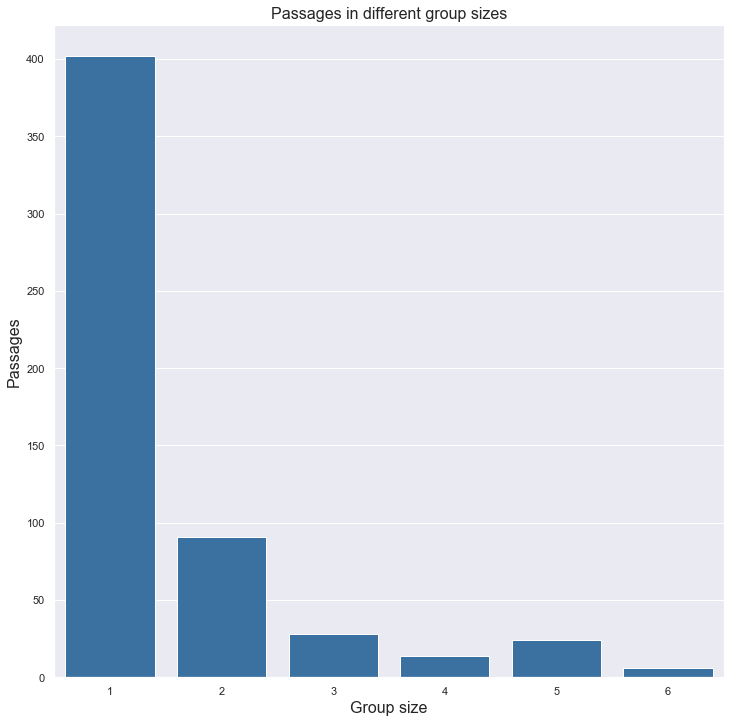

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

### Hur många passager utgörs av ensamma handjur eller hanar i grupper om 3 eller färre? Dvs group size ≤3 där alla individer är hanar ”sex=M”, alternativt sex=U men det blir kanske för osäkert.

In [37]:
male_group_size = gi[(gi['SEX'] == 'M') & (gi['GROUP SIZE'] <= 3)]\
.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [38]:
male_group_size

,GROUP SIZE,Passage
0,1,322
1,2,73
2,3,26


Text(0.5, 1.0, 'Passages by males in groups sizes <= 3')

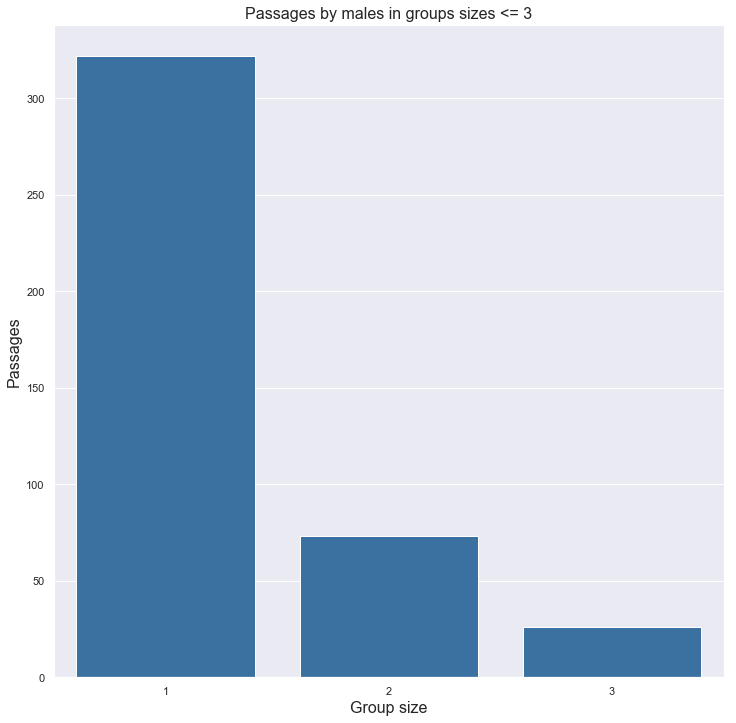

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=male_group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by males in groups sizes <= 3', fontsize=16)

### Heatmap of hour+month vs passage

In [191]:
hour_month = gi.groupby(['DATE.1', 'HOUR'], sort=False).sum()['Passage'].reset_index()

In [192]:
hour_month = add_month_digits(hour_month)

In [193]:
hour_month = hour_month.sort_values(by=['i','HOUR'])

In [194]:
hour_month

,DATE.1,HOUR,Passage,i
119,januari,0,2,0
20,januari,1,3,0
176,januari,2,1,0
19,januari,3,2,0
120,januari,4,2,0
181,januari,5,1,0
182,januari,6,1,0
21,januari,8,8,0
114,januari,9,2,0
117,januari,10,3,0


In [195]:
hour_month = hour_month[['i', 'HOUR', 'Passage']]

In [198]:
hour_month = hour_month.rename(index=str, 
                               columns={"i": "Month", 
                                        "HOUR": "Hour"})

In [199]:
hour_month = hour_month.pivot('Hour', 'Month', 'Passage')

In [202]:
hour_month.fillna(0, inplace=True)

In [203]:
hour_month

Month,0,1,2,3,4,5,6,7,8,9,10,11
Hour,,,,,,,,,,,,
0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0
1,3.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,1.0
2,1.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0
3,2.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
4,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
5,1.0,1.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0,1.0
6,1.0,1.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,10.0,7.0,8.0
7,0.0,6.0,5.0,2.0,2.0,4.0,9.0,6.0,1.0,14.0,2.0,14.0
8,8.0,2.0,4.0,1.0,2.0,2.0,7.0,2.0,4.0,2.0,1.0,6.0


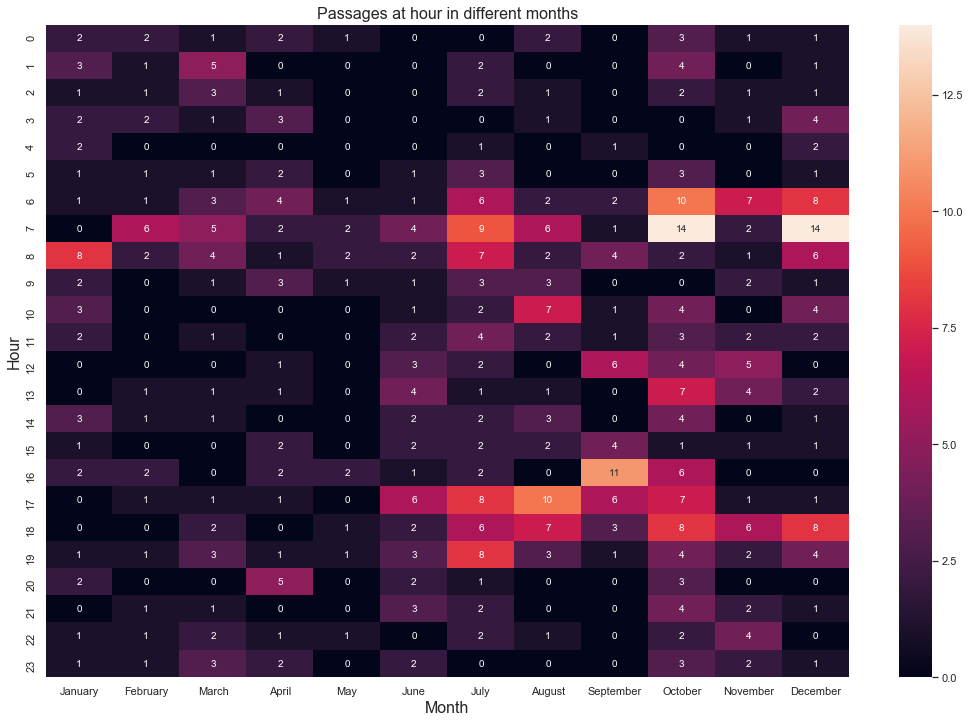

In [208]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(hour_month, ax=ax, annot=True)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Hour', fontsize=16)
ax.set_title('Passages at hour in different months', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

In [243]:
xls = pd.ExcelFile('weather.xlsx')
we = pd.read_excel(xls, 'Daily Weather')

In [245]:
gi.head()

,DATE,DATE.1,CORRIDOR,HOUR,SEX,DIRECTION,IN,OUT,GROUP SIZE,Passage W/O along,Passage,COMMENT,MOON LUMINOSITY,MEAN TEMP,PRESSURE,HUMIDITY,WIND SPEED,CLOUD COVERAGE,DATE.2
2,2015-10-03,oktober,2.0,7,M,IN,1,0,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
3,2015-10-03,oktober,2.0,13,M,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
4,2015-10-03,oktober,2.0,13,U,OUT,0,1,1,1,1,NaN,0.8,23.0,1020.0,60.0,5.9,60.0,2015-10-03
5,2015-10-04,oktober,2.0,8,M,IN,1,0,1,1,1,NaN,0.7,22.0,1020.0,60.0,4.7,50.0,2015-10-04
12,2015-10-11,oktober,2.0,20,M,OUT,0,1,1,1,1,NaN,0.0,22.0,1020.0,60.0,4.1,50.0,2015-10-11


In [246]:
we.head()

,Date,Rain,Rain7,Rain30,Rain90,Temp,Temp7,Temp30,Temp90,Pressure ~,...,Temp7hi-lo,Temp30hi-lo,Temp90hi-lo,Rain7hi-lo,Rain30hi-lo,Rain90hi-lo,Unnamed: 24,Sum IN,Sum OUT,Sum INOUT
0,2015-10-01,18.0,12.0,11.0,10.0,23.0,21.857143,20.900000,19.644444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
1,2015-10-02,18.0,13.0,11.0,10.0,23.0,22.142857,20.966667,19.700000,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0
2,2015-10-03,18.0,14.0,11.0,10.0,23.0,22.428571,21.066667,19.744444,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,2,3
3,2015-10-04,18.0,15.0,11.0,10.0,22.0,22.571429,21.133333,19.788889,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,1,0,1
4,2015-10-05,18.0,16.0,12.0,10.0,22.0,22.571429,21.200000,19.833333,1020.0,...,3.0,2.0,1.0,2.0,2.0,1.0,NaN,0,0,0


In [247]:
we = we.rename(index=str, columns={"Date": "DATE"})

In [238]:
we_n = pd.read_json('weather_nanyuki_owm.json')

In [241]:
we_n.columns

Index(['city_id', 'clouds', 'dt', 'dt_iso', 'main', 'rain', 'weather', 'wind'], dtype='object')